# ========================================
# 📘 Analyse der Urlaubsverteilung im Jahr
# ========================================
# Autor: Andreas Pirsch
# Datum: 03. Mai 2025
# Beschreibung:
# Dieses Notebook analysiert Urlaubsdaten eines Unternehmens und gibt Einblick in Verteilung, Häufigkeit und mögliche Engpässe.

## 1. Einleitung
Ziel ist es, die Urlaubsverteilung im Laufe eines Kalenderjahres zu analysieren. Das Unternehmen möchte Engpässe erkennen, Stoßzeiten identifizieren und mögliche Handlungsempfehlungen ableiten.


In [1]:
# 2. Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Visualisierung schöner darstellen
sns.set(style="whitegrid")
%matplotlib inline

## 3. Daten einlesen
Die Daten liegen im CSV-Format vor. Jede Zeile repräsentiert einen genehmigten Urlaubsantrag.


In [2]:
# Beispiel-Daten laden
df = pd.read_csv("/content/urlaubsantraege.csv", parse_dates=["start_datum", "end_datum"])

# Erster Blick auf die Daten
df.head()


,mitarbeiter,abteilung,start_datum,end_datum
0,David,HR,2024-05-02,2024-05-02
1,David,Marketing,2024-10-19,2024-10-25
2,Clara,Finanzen,2024-06-10,2024-06-10
3,Anna,Vertrieb,2024-06-23,2024-07-02
4,Clara,Marketing,2024-03-28,2024-04-01


## 4. Datenüberblick und Vorbereitung
Wir schauen uns die Struktur an und bereiten neue Spalten zur Analyse vor.

In [3]:
# Basisinformationen
df.info()

# Dauer berechnen
df["urlaubstage"] = (df["end_datum"] - df["start_datum"]).dt.days + 1

# Monat extrahieren
df["monat"] = df["start_datum"].dt.month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   mitarbeiter  50 non-null     object        
 1   abteilung    50 non-null     object        
 2   start_datum  50 non-null     datetime64[ns]
 3   end_datum    50 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 1.7+ KB


## 5. Explorative Analyse
Wie ist der Urlaub über das Jahr verteilt? Welche Monate sind besonders beliebt?


<ipython-input-4-eaef265ce0f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=urlaub_monat, x="monat", y="urlaubstage", palette="Blues_d")


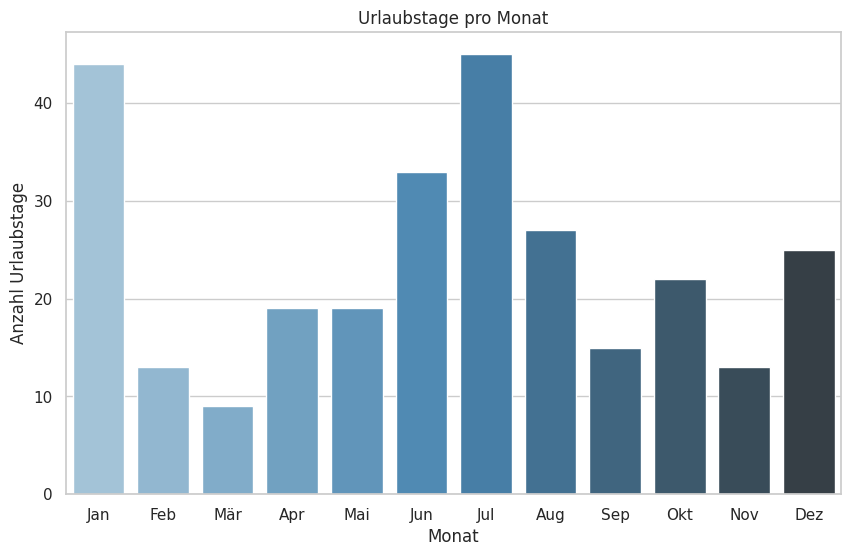

In [4]:
# Urlaubstage pro Monat
urlaub_monat = df.groupby("monat")["urlaubstage"].sum().reset_index()

# Visualisierung
plt.figure(figsize=(10, 6))
sns.barplot(data=urlaub_monat, x="monat", y="urlaubstage", palette="Blues_d")
plt.title("Urlaubstage pro Monat")
plt.xlabel("Monat")
plt.ylabel("Anzahl Urlaubstage")
plt.xticks(range(0,12), ["Jan", "Feb", "Mär", "Apr", "Mai", "Jun", "Jul", "Aug", "Sep", "Okt", "Nov", "Dez"])
plt.show()


## 6. Weitere Analysen (optional)
- Urlaub nach Abteilung
- Urlaub nach Mitarbeiter
- Durchschnittliche Urlaubsdauer

## 7. Fazit
Die Auswertung zeigt eine Konzentration von Urlauben in den Sommermonaten. Daraus lässt sich ableiten, dass besonders im Juli und August eine erhöhte Ausfallrate vorliegt. Eine bessere Urlaubsplanung könnte helfen, Engpässe zu vermeiden.
